In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('dataExploration').getOrCreate()

In [2]:
data = spark.read.csv("Datasets/Average Hourly Earnings by Industry ANZSIC06 and Sex Quarterly December 2018.csv",inferSchema=True,header=True)

In [3]:
data.show()

+-----------+-------------------+------+-----------------------------+------------------------+------------------------------------------------+
|YearQuarter|           Industry|Gender|Ordinary Time Hourly Earnings|Overtime Hourly Earnings|Total (Ordinary Time + Overtime) Hourly Earnings|
+-----------+-------------------+------+-----------------------------+------------------------+------------------------------------------------+
|     1989Q1|Forestry and Mining|  Male|                        13.97|                   16.74|                                           14.18|
|     1989Q2|Forestry and Mining|  Male|                        14.07|                   16.44|                                           14.24|
|     1989Q3|Forestry and Mining|  Male|                        14.04|                   16.64|                                           14.23|
|     1989Q4|Forestry and Mining|  Male|                         14.3|                    16.5|                                   

In [4]:
results = data.filter("Industry = 'All Industries'").select('YearQuarter','Gender','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsM = results.filter("Gender = 'Male'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsM.show()
resultsF = results.filter("Gender = 'Female'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsF.show()

+-----------+------------------------------------------------+
|YearQuarter|Total (Ordinary Time + Overtime) Hourly Earnings|
+-----------+------------------------------------------------+
|     1989Q1|                                           14.09|
|     1989Q2|                                           14.22|
|     1989Q3|                                           14.39|
|     1989Q4|                                           14.54|
|     1990Q1|                                           15.01|
|     1990Q2|                                           15.17|
|     1990Q3|                                           15.33|
|     1990Q4|                                           15.47|
|     1991Q1|                                           15.62|
|     1991Q2|                                           15.76|
|     1991Q3|                                           15.85|
|     1991Q4|                                           15.91|
|     1992Q1|                                          

In [5]:
resultsX = data.filter("Industry = 'Forestry and Mining'").select('YearQuarter','Gender','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsXM = resultsX.filter("Gender = 'Male'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsXM.show()
resultsXF = resultsX.filter("Gender = 'Female'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsXF.show()

+-----------+------------------------------------------------+
|YearQuarter|Total (Ordinary Time + Overtime) Hourly Earnings|
+-----------+------------------------------------------------+
|     1989Q1|                                           14.18|
|     1989Q2|                                           14.24|
|     1989Q3|                                           14.23|
|     1989Q4|                                           14.48|
|     1990Q1|                                           14.42|
|     1990Q2|                                            14.6|
|     1990Q3|                                           14.88|
|     1990Q4|                                           15.16|
|     1991Q1|                                           14.89|
|     1991Q2|                                           15.35|
|     1991Q3|                                           15.82|
|     1991Q4|                                           16.29|
|     1992Q1|                                          

In [6]:
resultsY = data.filter("Industry = 'Rental, Hiring and Real Estate Services'").select('YearQuarter','Gender','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsYM = resultsY.filter("Gender = 'Male'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsYM.show()
resultsYF = resultsY.filter("Gender = 'Female'").select('YearQuarter','Total (Ordinary Time + Overtime) Hourly Earnings')
resultsYF.show()

+-----------+------------------------------------------------+
|YearQuarter|Total (Ordinary Time + Overtime) Hourly Earnings|
+-----------+------------------------------------------------+
|     1989Q1|                                           14.37|
|     1989Q2|                                            14.7|
|     1989Q3|                                            15.1|
|     1989Q4|                                            15.9|
|     1990Q1|                                           16.19|
|     1990Q2|                                            15.9|
|     1990Q3|                                           16.12|
|     1990Q4|                                           16.18|
|     1991Q1|                                           16.13|
|     1991Q2|                                           16.16|
|     1991Q3|                                           16.22|
|     1991Q4|                                           16.43|
|     1992Q1|                                          

In [7]:
results1 = resultsM.toPandas()
results2 = resultsF.toPandas()

In [8]:
results3 = resultsXM.toPandas()
results4 = resultsXF.toPandas()

In [9]:
results5 = resultsYM.toPandas()
results6 = resultsYF.toPandas()

In [10]:
import matplotlib.pyplot as plt

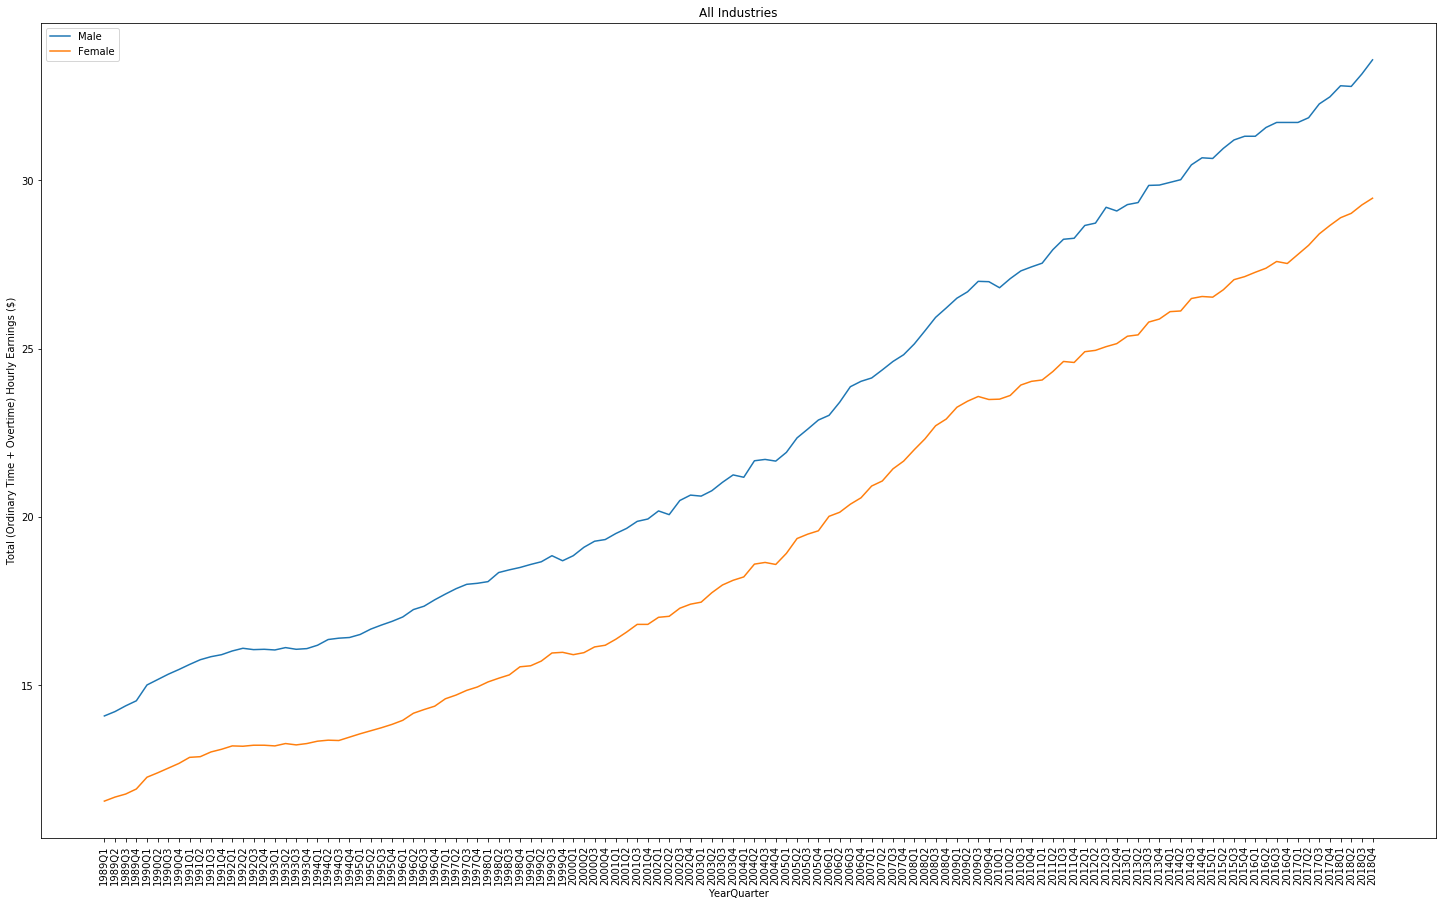

In [16]:
names = results1['YearQuarter']
values1 = results1['Total (Ordinary Time + Overtime) Hourly Earnings']
values2 = results2['Total (Ordinary Time + Overtime) Hourly Earnings']

fig, ax = plt.subplots()
ax.plot(names, values1, label="Male")
ax.plot(names, values2, label="Female")
ax.legend()

ax.set_xlabel('YearQuarter')
ax.set_ylabel('Total (Ordinary Time + Overtime) Hourly Earnings ($)')
ax.set_title('All Industries')

plt.xticks(rotation=90)

plt.rcParams["figure.figsize"] = (25,15)

plt.show()

In [12]:
import matplotlib.pyplot as plt2

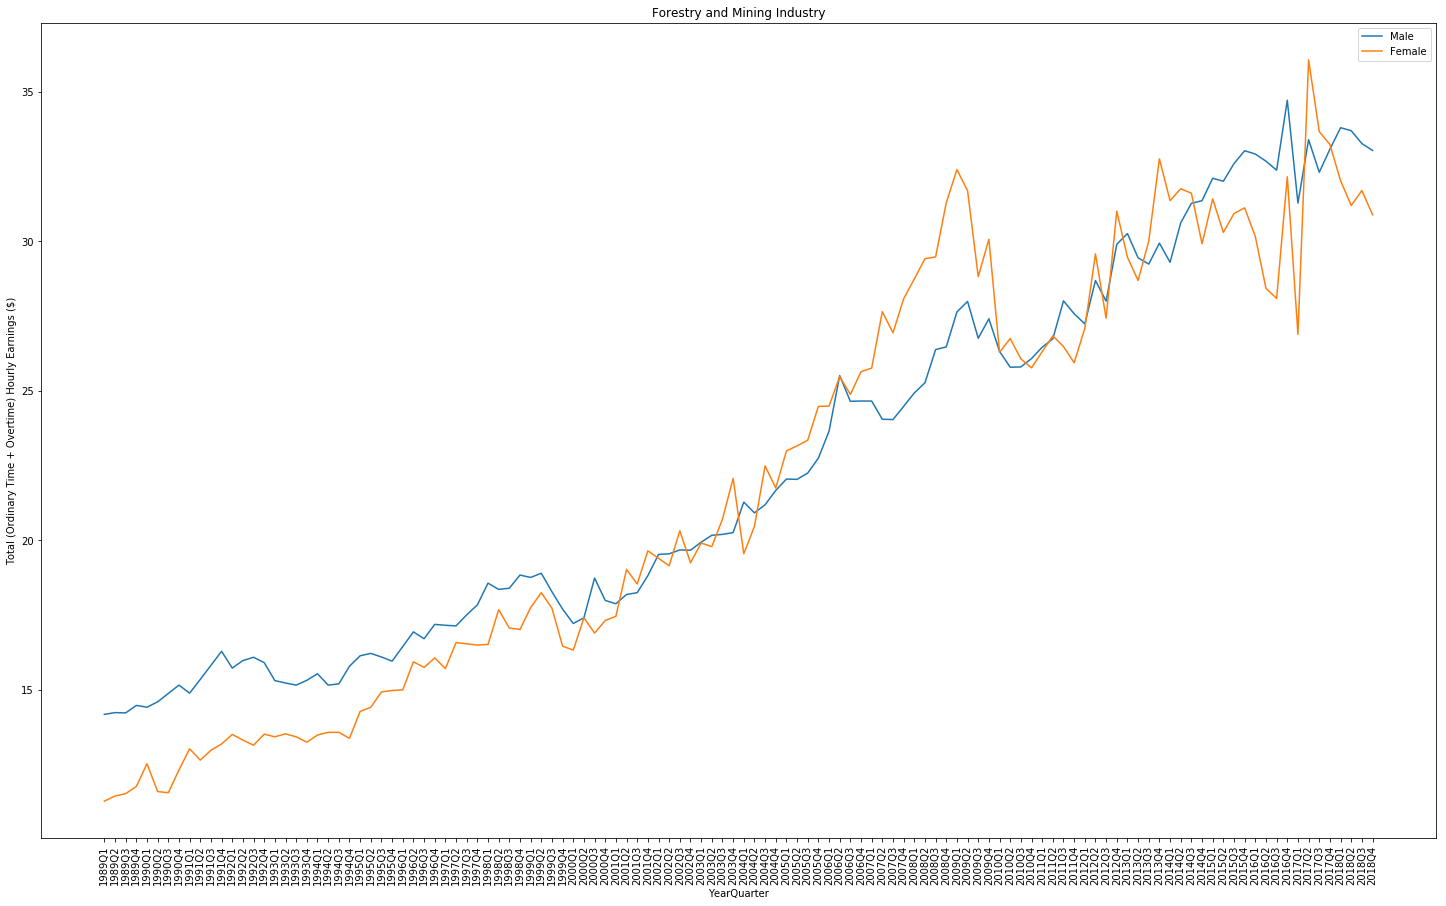

In [13]:
names2 = results3['YearQuarter']
values3 = results3['Total (Ordinary Time + Overtime) Hourly Earnings']
values4 = results4['Total (Ordinary Time + Overtime) Hourly Earnings']

fig1, ax1 = plt2.subplots()
ax1.plot(names2, values3, label="Male")
ax1.plot(names2, values4, label="Female")
ax1.legend()

ax1.set_xlabel('YearQuarter')
ax1.set_ylabel('Total (Ordinary Time + Overtime) Hourly Earnings ($)')
ax1.set_title('Forestry and Mining Industry')

plt2.xticks(rotation=90)

plt2.rcParams["figure.figsize"] = (25,15)

plt2.show()

In [14]:
import matplotlib.pyplot as plt3

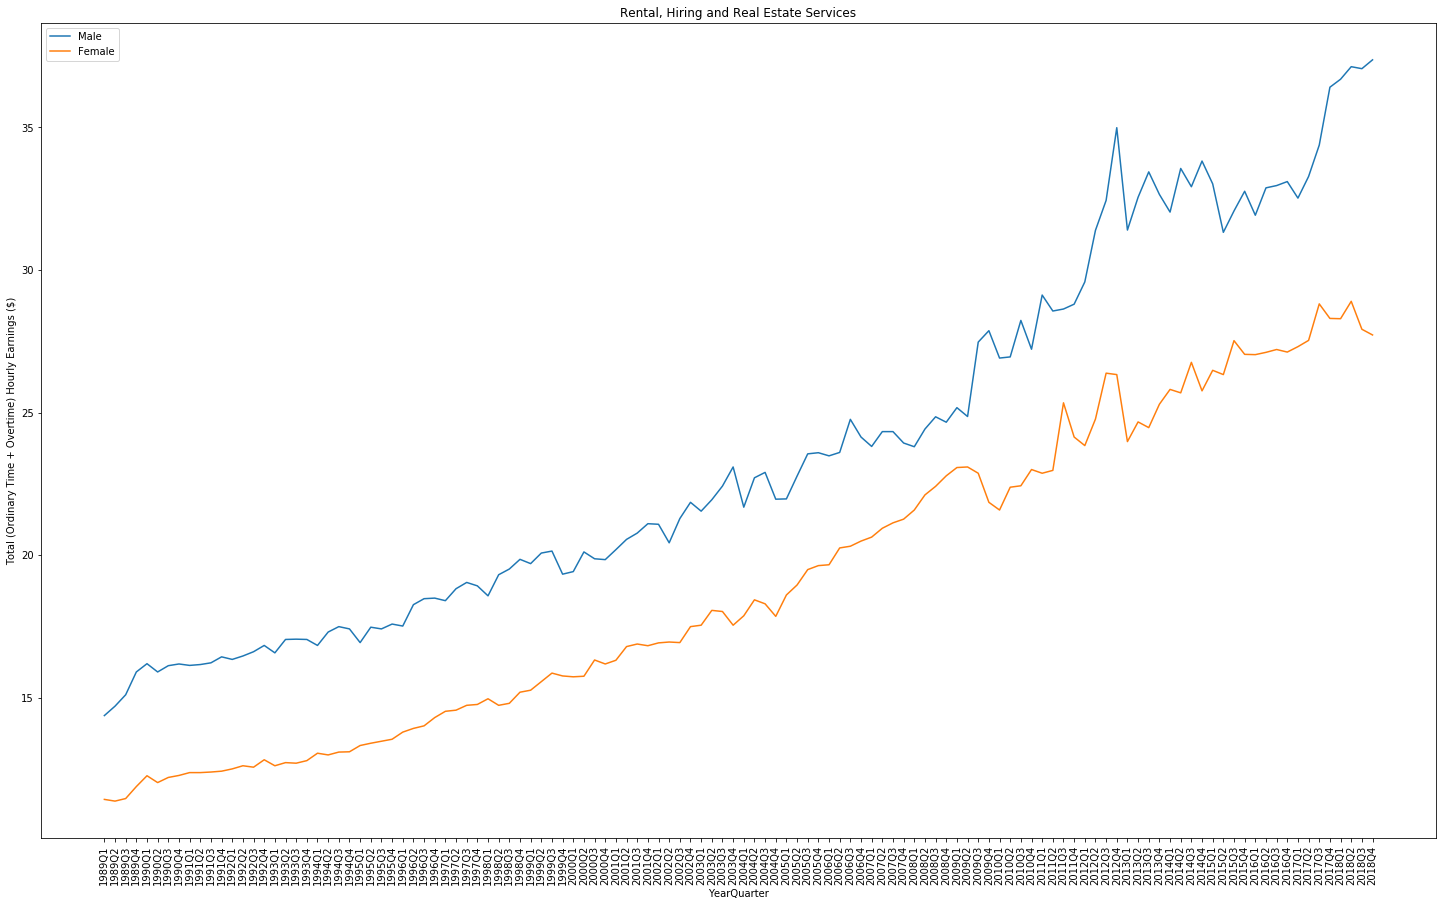

In [15]:
names3 = results5['YearQuarter']
values5 = results5['Total (Ordinary Time + Overtime) Hourly Earnings']
values6 = results6['Total (Ordinary Time + Overtime) Hourly Earnings']

fig2, ax2 = plt.subplots()
ax2.plot(names3, values5, label="Male")
ax2.plot(names3, values6, label="Female")
ax2.legend()

ax2.set_xlabel('YearQuarter')
ax2.set_ylabel('Total (Ordinary Time + Overtime) Hourly Earnings ($)')
ax2.set_title('Rental, Hiring and Real Estate Services')

plt3.xticks(rotation=90)

plt3.rcParams["figure.figsize"] = (25,15)

plt3.show()